In [2]:
pip install matplotlib cartopy geopandas pandas


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Let's load our libraries we will be using 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
import missingno as msno 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [55]:
from sklearn.linear_model import LinearRegression

In [5]:
#Let's import our datasets now
bikeshare_jan_2021 = pd.read_csv('202101-divvy-tripdata.csv', parse_dates= True)
bikeshare_feb_2021 = pd.read_csv('202102-divvy-tripdata.csv', parse_dates= True)
bikeshare_mar_2021 = pd.read_csv('202103-divvy-tripdata.csv', parse_dates= True)
bikeshare_apr_2021 = pd.read_csv('202104-divvy-tripdata.csv', parse_dates= True)
bikeshare_may_2021 = pd.read_csv('202105-divvy-tripdata.csv', parse_dates= True)
bikeshare_jun_2021 = pd.read_csv('202106-divvy-tripdata.csv', parse_dates= True)
bikeshare_jul_2021 = pd.read_csv('202107-divvy-tripdata.csv', parse_dates= True)
bikeshare_aug_2021 = pd.read_csv('202108-divvy-tripdata.csv', parse_dates= True)
bikeshare_sep_2021 = pd.read_csv('202109-divvy-tripdata.csv', parse_dates= True)
bikeshare_oct_2021 = pd.read_csv('202110-divvy-tripdata.csv', parse_dates= True)
bikeshare_nov_2021 = pd.read_csv('202111-divvy-tripdata.csv', parse_dates= True)
bikeshare_dec_2021 = pd.read_csv('202112-divvy-tripdata.csv', parse_dates= True)


In [6]:
concat_rows_df = pd.concat([bikeshare_jan_2021, bikeshare_feb_2021, bikeshare_mar_2021, bikeshare_apr_2021,
                           bikeshare_may_2021, bikeshare_jun_2021, bikeshare_jul_2021, bikeshare_aug_2021,
                           bikeshare_sep_2021, bikeshare_oct_2021, bikeshare_nov_2021, bikeshare_dec_2021], axis = 0)

In [7]:
concat_rows_df.index
#We reset the index key and make the ride_id column the index

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       247530, 247531, 247532, 247533, 247534, 247535, 247536, 247537, 247538,
       247539],
      dtype='int64', length=5595063)

In [8]:
Year_2021_citibike = concat_rows_df.reset_index(drop = True)

In [9]:
Year_2021_citibike.dtype

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

<Axes: >

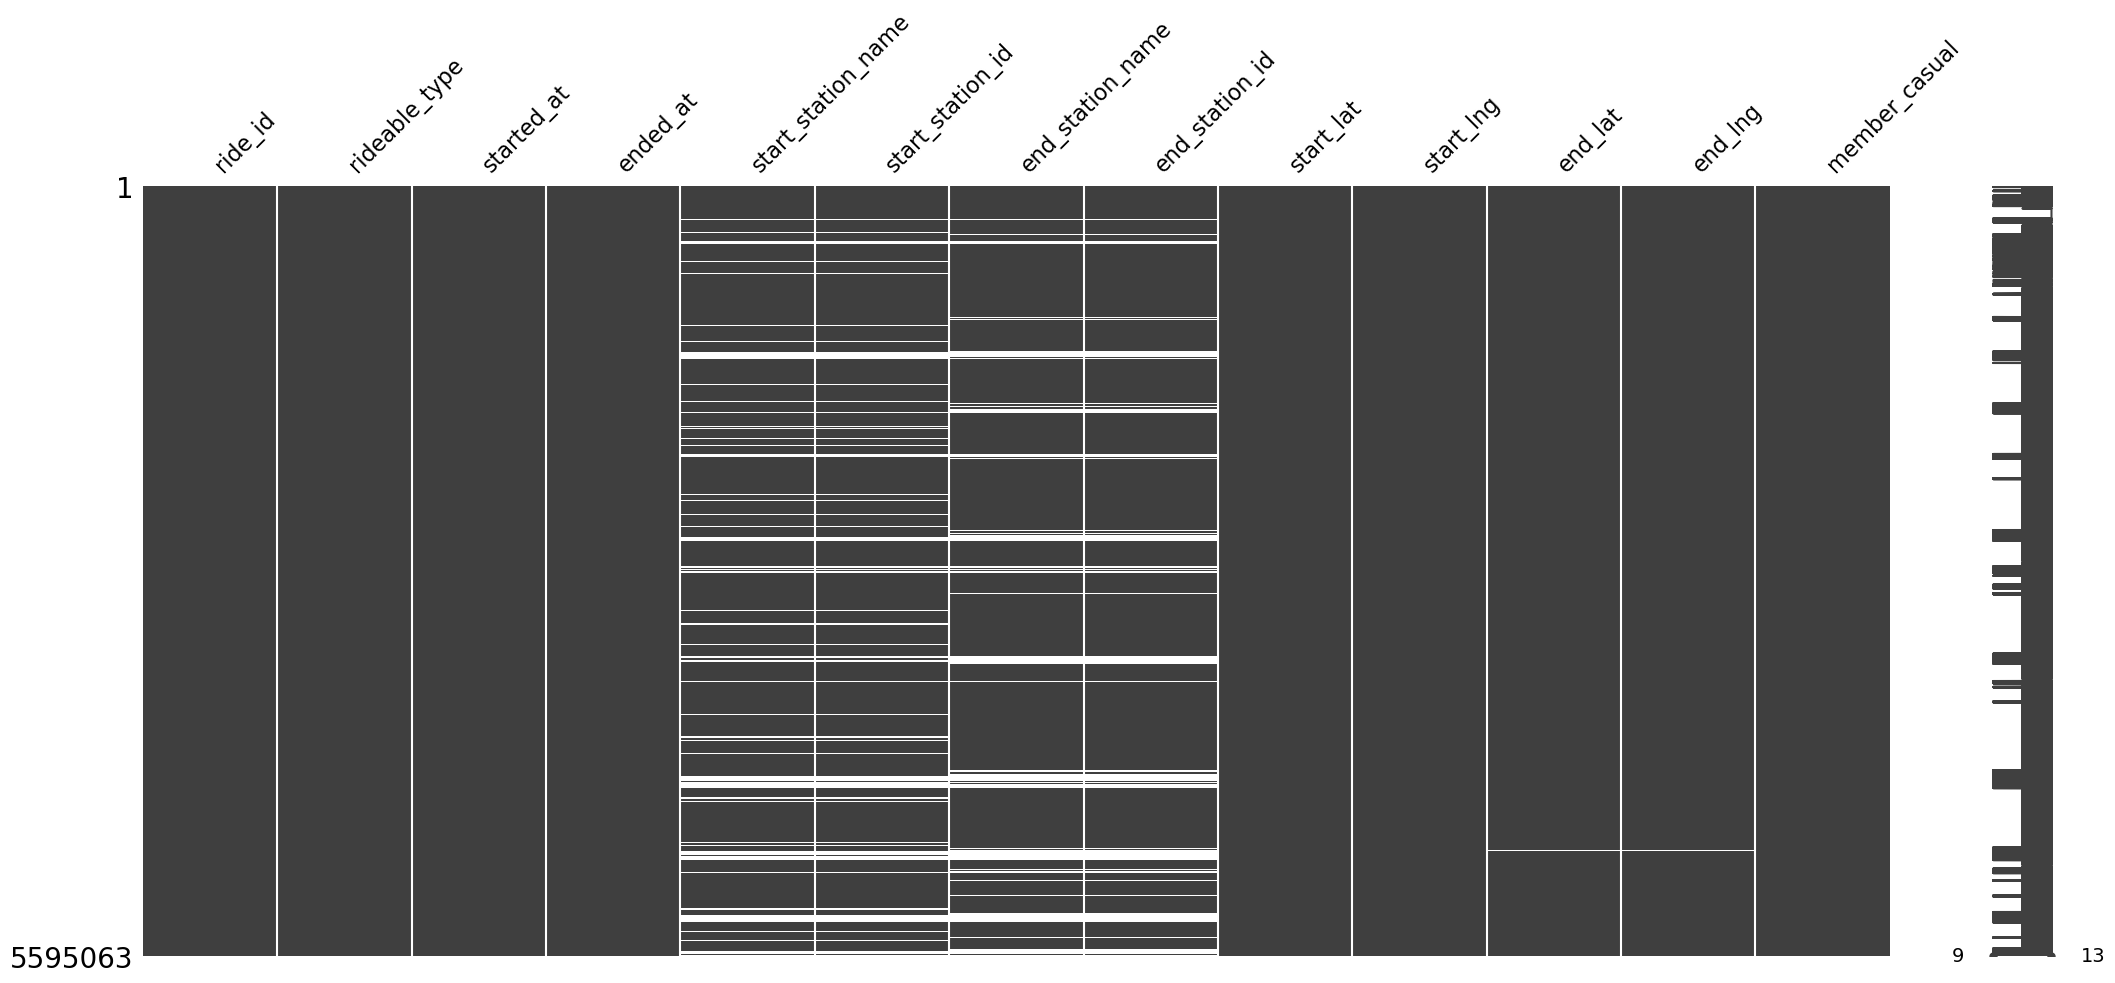

In [10]:
#The code fragment below gives us a visual representation of where the missing values are in the data. We see that most
#of the missing data lies in the station_name/id columns. 
msno.matrix(Year_2021_citibike)

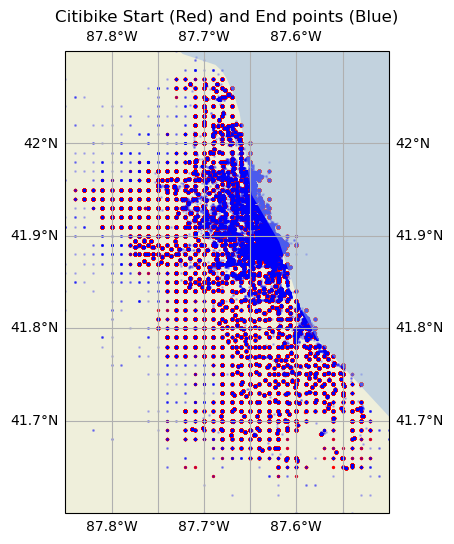

In [11]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black')  # Add land borders
# ax.add_feature(cfeature.OCEAN)                   # Add ocean
# ax.add_feature(cfeature.COASTLINE)               # Add coastline
# ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add country borders
ax.add_feature(cfeature.LAKES, alpha=0.5)        # Add lakes
# ax.add_feature(cfeature.RIVERS)                  # Add rivers

# Plot the points
ax.scatter(Year_2021_citibike['start_lng'], Year_2021_citibike['start_lat'], color='red', label='Start_points' ,s=2, transform=ccrs.PlateCarree())

#Plot End poitns
ax.scatter(Year_2021_citibike['end_lng'], Year_2021_citibike['end_lat'], color='blue', alpha = 0.2, label = 'End_points', s=1, transform=ccrs.PlateCarree())
# Add gridlines
ax.gridlines(draw_labels=True)

# Set the extent of the map (optional)
ax.set_extent([-87.85, -87.5, 41.6, 42.1], crs=ccrs.PlateCarree())

# Add a title
plt.title('Citibike Start (Red) and End points (Blue)')

# Show the plot
plt.show()

In [9]:
#Let's now extract the date, time and month etc. from the start and end dates and put them into new columns. 
#But before we do that we need to change the datatype of the date columns from object to datettime objects


In [12]:
df = Year_2021_citibike
#Now let's extract the day of the week, time of the week and the month from this data. We assume that a trip started most likely ends on the
#same day although this is strictly not true. 


In [13]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [14]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [15]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [16]:
df["hour_started_at"] = df["started_at"].dt.hour

In [17]:
df['day_of_week'] = df['started_at'].dt.weekday  # Returns 0 (Mon) to 6 (Sun)
df['month'] = df['started_at'].dt.month

In [23]:
#Now Let's map the days of the week to named varialbles i.e. Mon = 0 etc. and same for the months. 
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour_started_at,day_of_week,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,16,5,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,18,2,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,22,3,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,13,3,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,13,6,12
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,19,0,12
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,8,3,12
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,9,0,12


In [18]:
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df['day_of_week_name'] = df['day_of_week'].map(lambda x: days[x])

In [19]:
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month_of_2021'] = df['month'].map(lambda x: Months[x-1])

In [20]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour_started_at,day_of_week,month,day_of_week_name,month_of_2021
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,16,5,1,Sat,Jan
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,18,2,1,Wed,Jan
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,22,3,1,Thu,Jan
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,13,3,1,Thu,Jan
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,2,5,1,Sat,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,13,6,12,Sun,Dec
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,19,0,12,Mon,Dec
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,8,3,12,Thu,Dec
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,9,0,12,Mon,Dec


In [21]:
trip_duration = df['ended_at'] - df['started_at']
trip_duration_in_seconds = trip_duration.dt.total_seconds()

In [22]:
#We won't calculate the distance travelled since we only have data for the end points and not the actual path of the bike rides. We
#can calcuate the duration of each trip. Lets do that. 

df['trip_duration_in_seconds'] = trip_duration_in_seconds



In [23]:
df = df[df['trip_duration_in_seconds'] > 0]

In [24]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour_started_at,day_of_week,month,day_of_week_name,month_of_2021,trip_duration_in_seconds
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,16,5,1,Sat,Jan,625.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,18,2,1,Wed,Jan,244.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,22,3,1,Thu,Jan,80.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,13,3,1,Thu,Jan,702.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,2,5,1,Sat,Jan,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,13,6,12,Sun,Dec,1153.0
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,19,0,12,Mon,Dec,421.0
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,8,3,12,Thu,Dec,497.0
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,9,0,12,Mon,Dec,853.0


In [54]:
#Now that we have processed our data let's do some visualization and analysis of the data. 

<Axes: xlabel='hour_started_at', ylabel='count'>

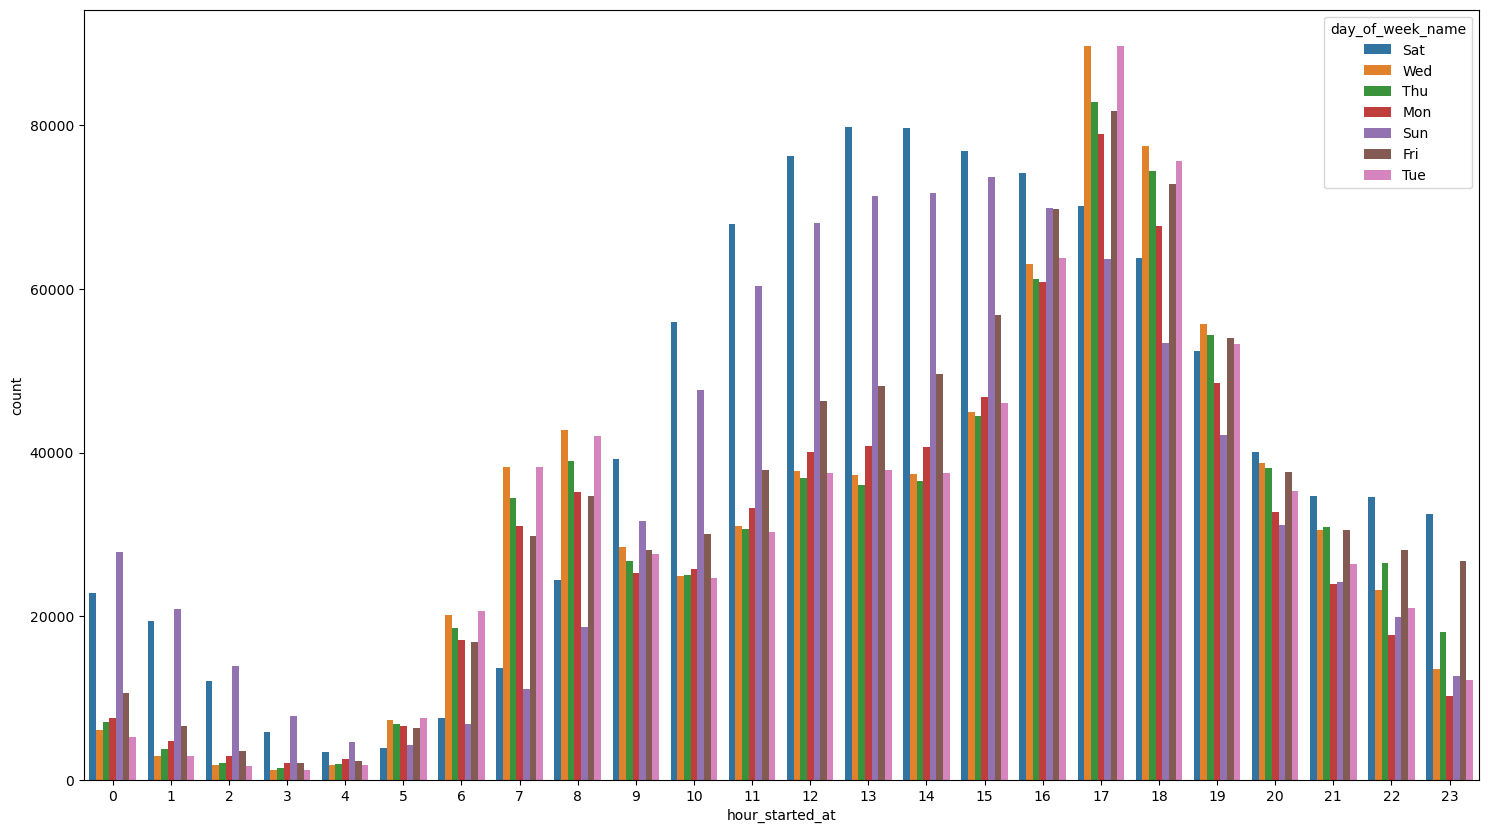

In [25]:
plt.figure(figsize=(18,10))
sns.countplot(data = df, x = 'hour_started_at', hue = 'day_of_week_name')

In [108]:
#We see that most of the users prefer riding their bikes in the evening between 4pm - 6pm. 

<Axes: xlabel='day_of_week_name', ylabel='count'>

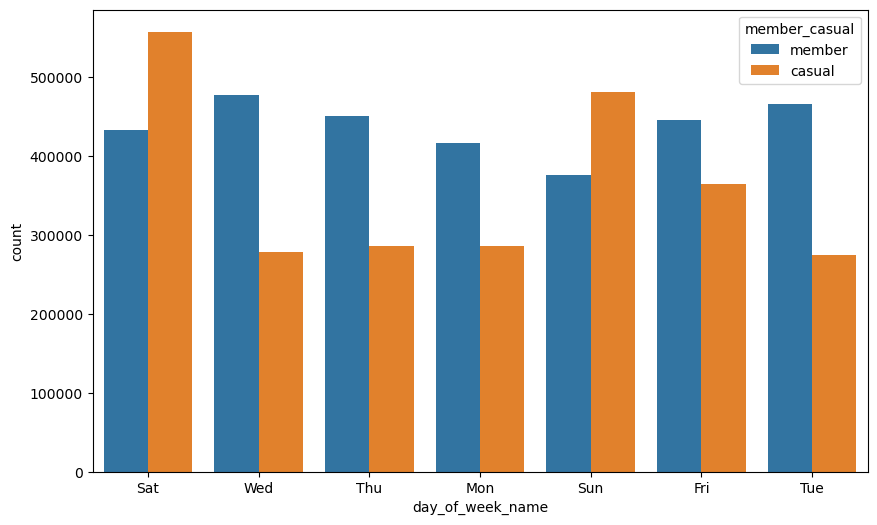

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'day_of_week_name', hue = 'member_casual')

In [122]:
#We see that more non-members are more likely to ride the bikes on tuesday as opposed to members. Whereas more members prefer weekdays. 

<Axes: xlabel='day_of_week_name', ylabel='count'>

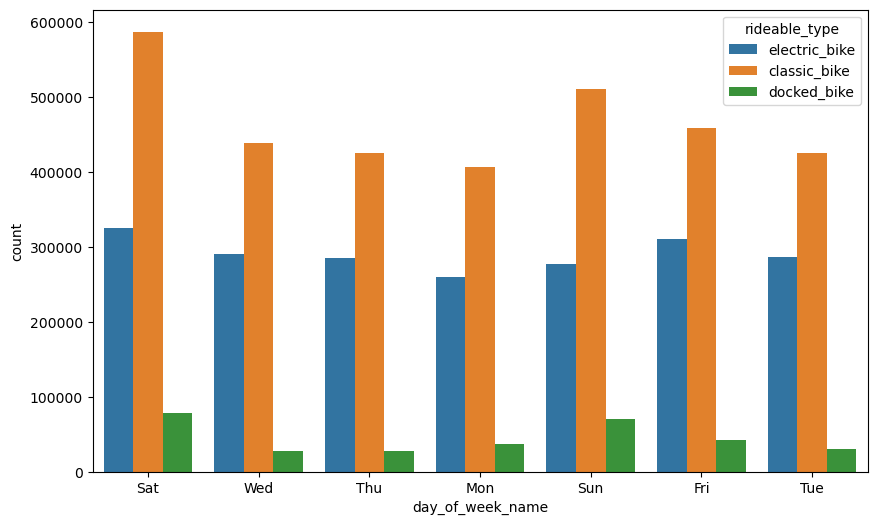

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'day_of_week_name', hue = 'rideable_type')

In [39]:
min(df['trip_duration_in_seconds'])

1.0

In [29]:
x_values = np.arange(len(df))

<Axes: ylabel='trip_duration_in_seconds'>

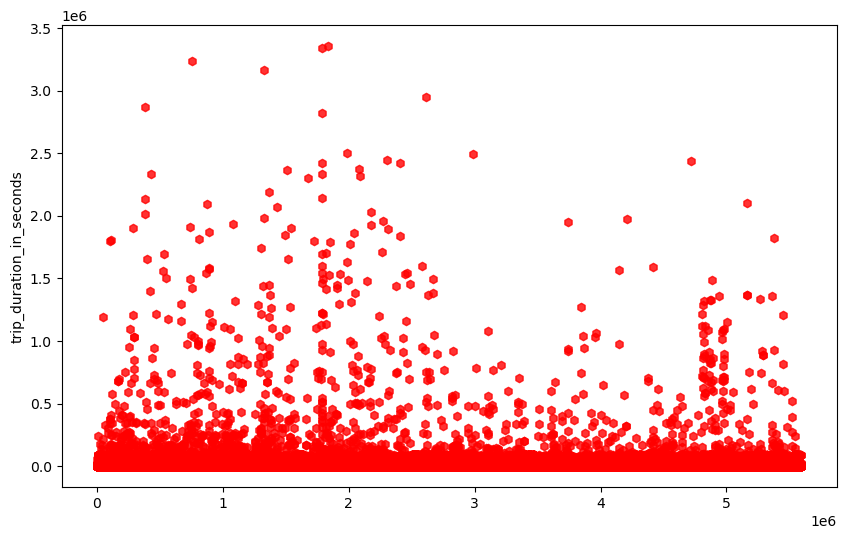

In [30]:
plt.figure(figsize=(10, 6))

sns.regplot(x= x_values, y=df['trip_duration_in_seconds'], scatter=True, ci=None, marker = 'h', color = 'red')


<Axes: xlabel='month_of_2021', ylabel='count'>

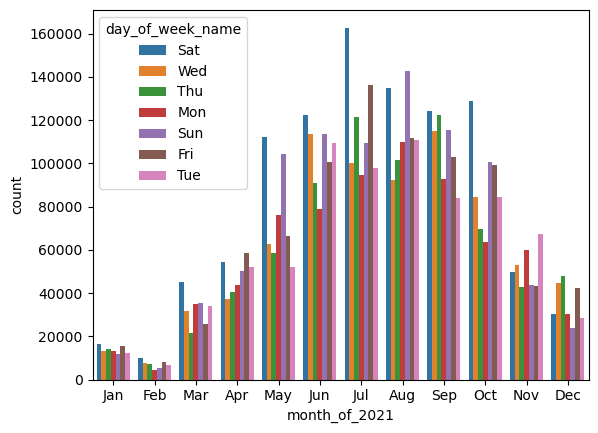

In [31]:
sns.countplot(data = df, x= 'month_of_2021', hue = 'day_of_week_name')

In [32]:
#Let's count the number of times a start and end_station appears in our data. 
start_station_count = df['start_station_name'].value_counts()
end_station_count = df['end_station_name'].value_counts()

/Users/sujitnarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

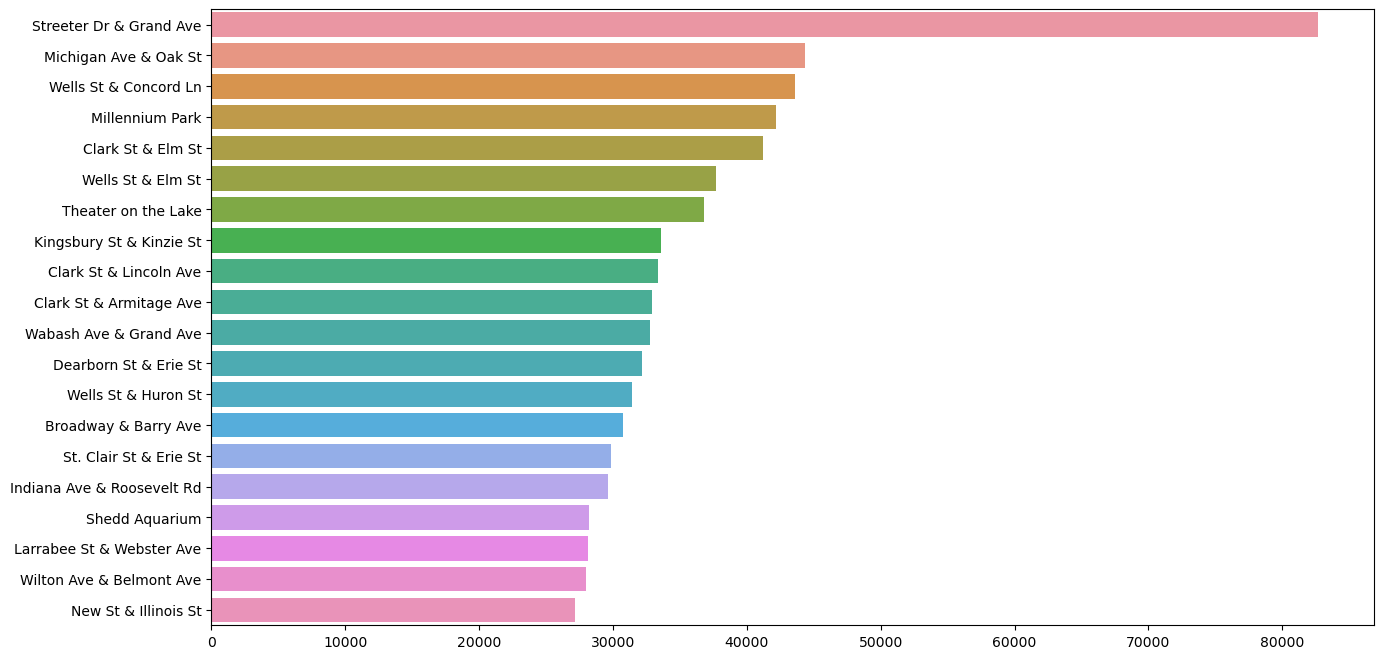

In [33]:
top_start_stations = start_station_count.head(20)
plt.figure(figsize = (15, 8))
sns.barplot(y = list(top_start_stations.index), x= top_start_stations.values)


/Users/sujitnarayanan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

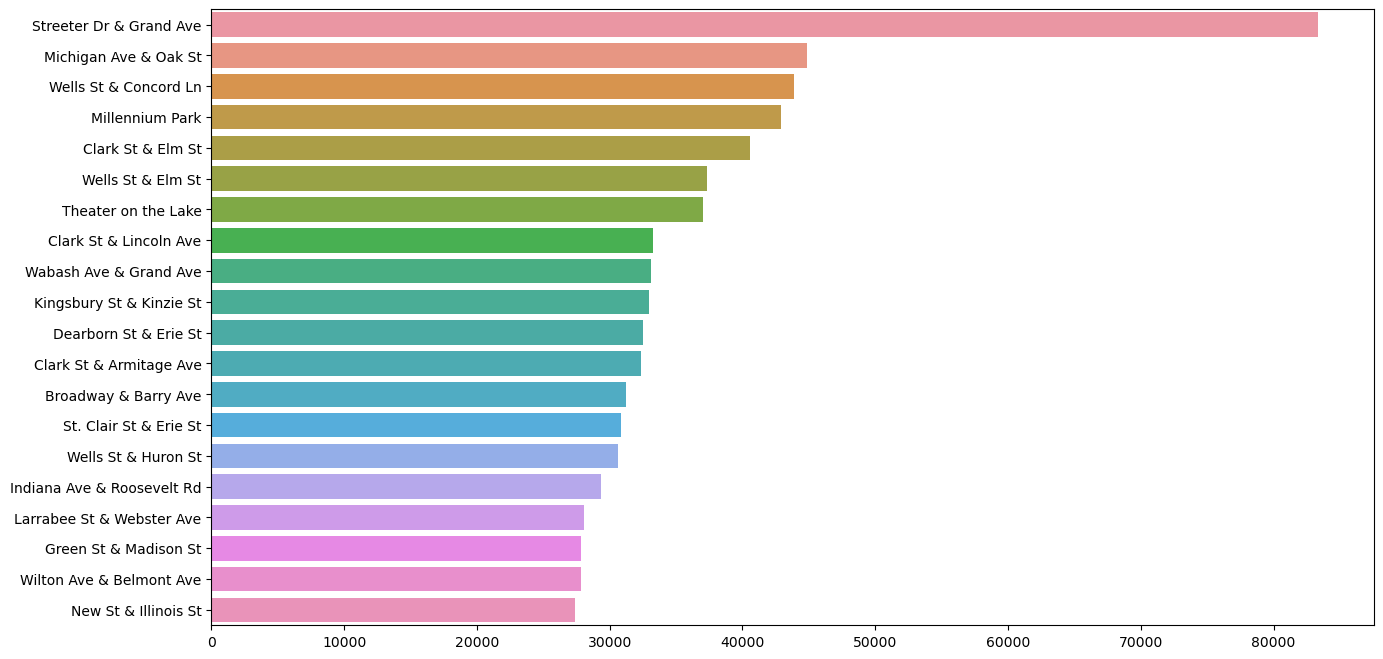

In [34]:
top_end_stations = end_station_count.head(20)
plt.figure(figsize = (15, 8))
sns.barplot(y = list(top_end_stations.index), x= top_end_stations.values)

Let's filter out data by start and end station names that don't have atleast 500 entries 

<Axes: xlabel='rideable_type', ylabel='count'>

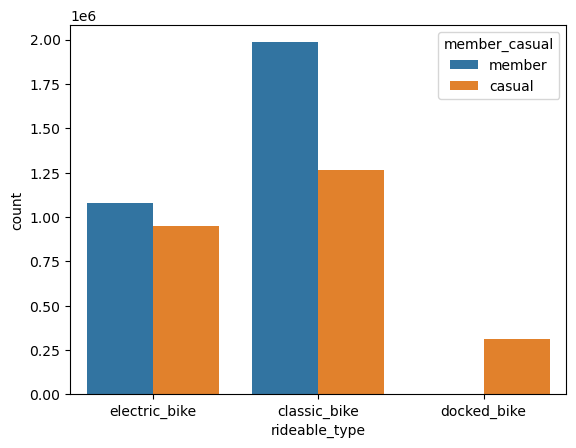

In [35]:
sns.countplot(data = df, x = 'rideable_type',hue = 'member_casual' )

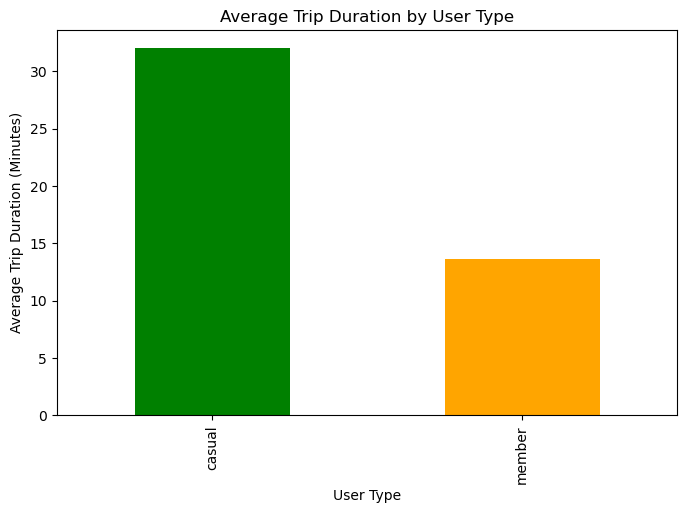

In [36]:
# Group by user type and calculate average trip duration
avg_duration_by_user = df.groupby('member_casual')['trip_duration_in_seconds'].mean() / 60  # Convert to minutes

# Plot
plt.figure(figsize=(8, 5))
avg_duration_by_user.plot(kind='bar', color=['green', 'orange'])
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration by User Type')
plt.show()

<Axes: xlabel='hour_started_at', ylabel='count'>

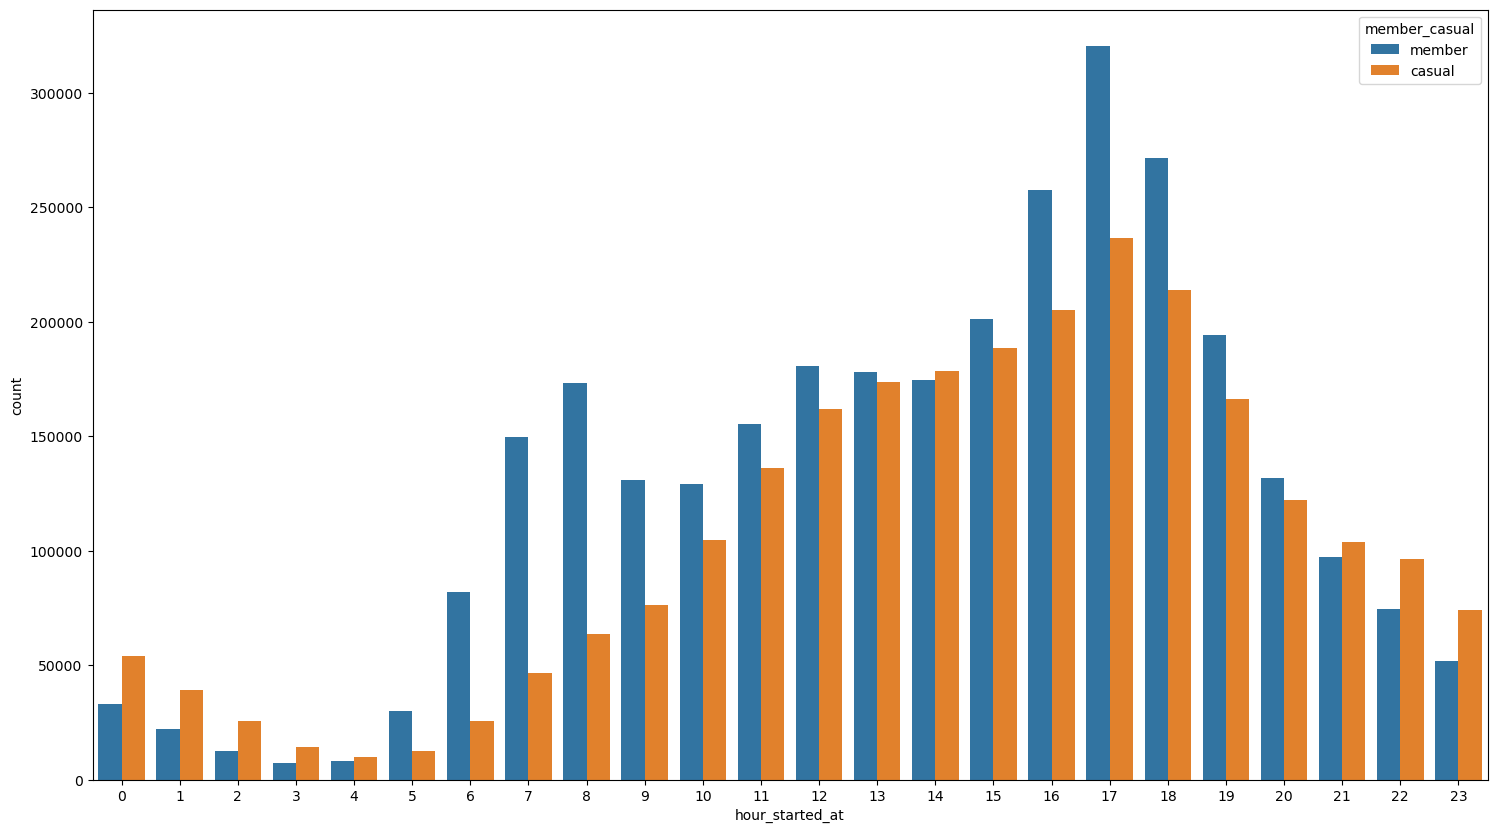

In [37]:

plt.figure(figsize=(18,10))
sns.countplot(data = df, x = 'hour_started_at', hue = 'member_casual')

In [ ]:
#We already know the stations that are more popular for starting and ending trips. Now let's look at 
#pairs of stations at are popular for starting and ending trips

In [38]:
station_pairs = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='ride_count')

In [39]:
station_pairs_sorted = station_pairs.sort_values(by='ride_count', ascending=False)

In [40]:
top_station_pairs = station_pairs_sorted.head(10)
top_station_pairs
#We see that the top trips are usually cyclical in that it starts and ends at the same station.

,start_station_name,end_station_name,ride_count
134555,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,13027
96741,Michigan Ave & Oak St,Michigan Ave & Oak St,6674
98851,Millennium Park,Millennium Park,6470
78762,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,5132
54296,Ellis Ave & 60th St,Ellis Ave & 55th St,5098
54012,Ellis Ave & 55th St,Ellis Ave & 60th St,4613
135293,Theater on the Lake,Theater on the Lake,4020
100779,Montrose Harbor,Montrose Harbor,3776
54379,Ellis Ave & 60th St,University Ave & 57th St,3685
13221,Buckingham Fountain,Buckingham Fountain,3625


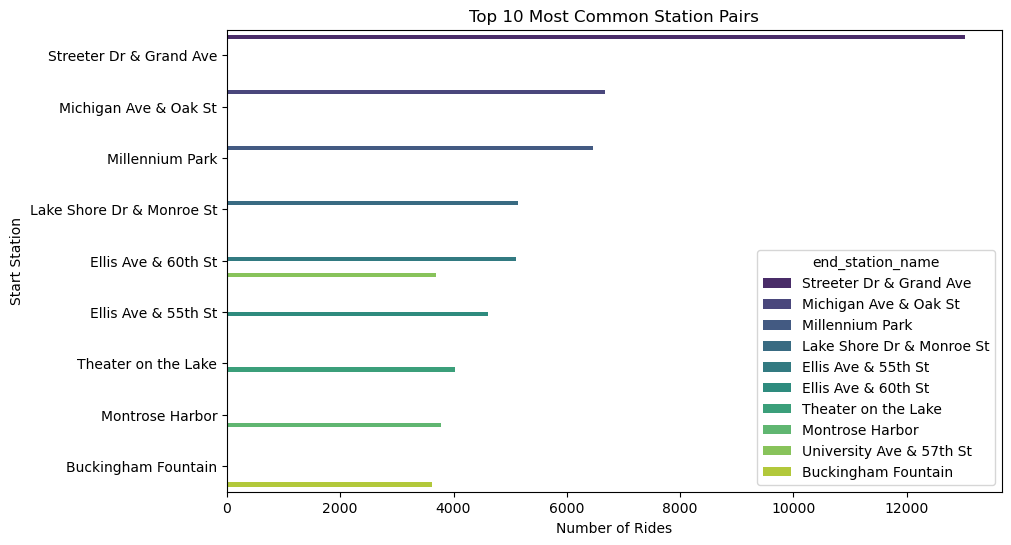

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_station_pairs, x='ride_count', y='start_station_name', hue='end_station_name', palette='viridis')

# Add labels and title
plt.xlabel('Number of Rides')
plt.ylabel('Start Station')
plt.title('Top 10 Most Common Station Pairs')

# Show the plot
plt.show()

In [42]:
df['member_casual'] = df['member_casual'].map({'member': 0, 'casual': 1})

/var/folders/dn/t1jyr93n2pz9t132yhd9jdmm0000gn/T/ipykernel_10955/3912521430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['member_casual'] = df['member_casual'].map({'member': 0, 'casual': 1})


In [100]:
from sklearn.cluster import KMeans

In [101]:
# Let's extract the number of rides corresponding to each hour

In [102]:
hour_counts = df['hour_started_at'].value_counts().sort_index().reset_index()

In [105]:
hour_counts.columns = ['hour', 'trip_count']
hour_counts

,hour,trip_count
0,0,87046
1,1,61138
2,2,38014
3,3,21233
4,4,18096
5,5,42583
6,6,107562
7,7,196393
8,8,236763
9,9,206999


In [104]:
#we want to classify the hours based on the number of trips made during the hour and then categorize them as peak use hours, moderate  use hours and 
#low use hours

In [108]:
#Feature for clustering
X = hour_counts['trip_count'].values.reshape(-1, 1) 

In [110]:
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for peak use, moderate use, low use
hour_counts['cluster'] = kmeans.fit_predict(X)

/Users/sujitnarayanan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [111]:
# Sort clusters by their centers to assign meaningful labels
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = sorted(zip(cluster_centers, range(3)), key=lambda x: x[0])

In [116]:
# Assign labels based on cluster centers
cluster_labels = {sorted_clusters[0][1]: 'Low Use Hours',
                  sorted_clusters[1][1]: 'Medium Use Hours',
                  sorted_clusters[2][1]: 'Peak Hours'}
hour_counts['trip_category'] = hour_counts['cluster'].map(cluster_labels)

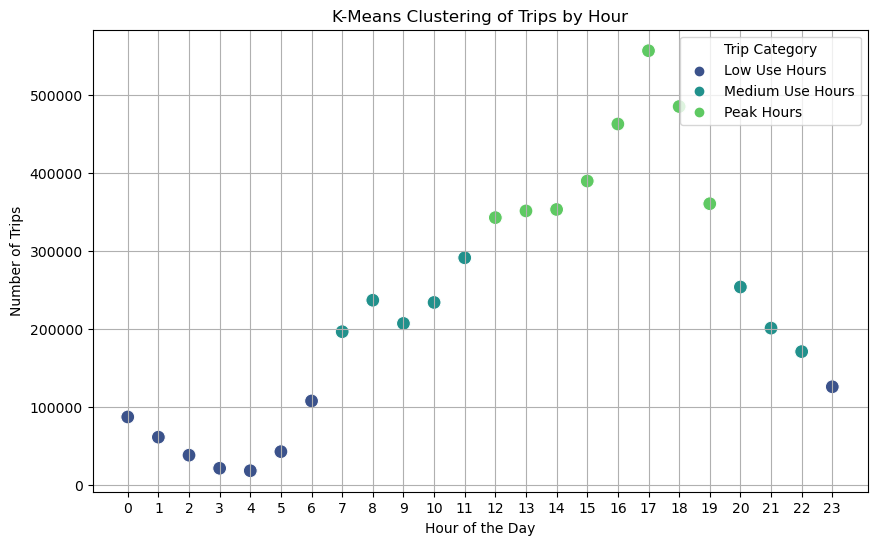

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_counts, x='hour', y='trip_count', hue='trip_category', palette='viridis', s=100)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('K-Means Clustering of Trips by Hour')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(True)
plt.legend(title='Trip Category')
plt.show()

In [119]:
#Let's check how this changes based on adding the week of the day variable

In [120]:
trip_counts = df.groupby(['hour_started_at', 'day_of_week']).size().reset_index(name='trip_count')

In [121]:
X = trip_counts[['hour_started_at', 'day_of_week', 'trip_count']]  # Features for clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters for peak use, moderate use, low use
trip_counts['cluster'] = kmeans.fit_predict(X)

/Users/sujitnarayanan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [122]:
cluster_centers = kmeans.cluster_centers_[:, 2]  # Use trip_count for labeling
sorted_clusters = sorted(zip(cluster_centers, range(3)), key=lambda x: x[0])

In [123]:
cluster_labels = {sorted_clusters[0][1]: 'Low Bike Use',
                  sorted_clusters[1][1]: 'Medium Bike Use',
                  sorted_clusters[2][1]: 'Peak Bike Use'}
trip_counts['trip_category'] = trip_counts['cluster'].map(cluster_labels)

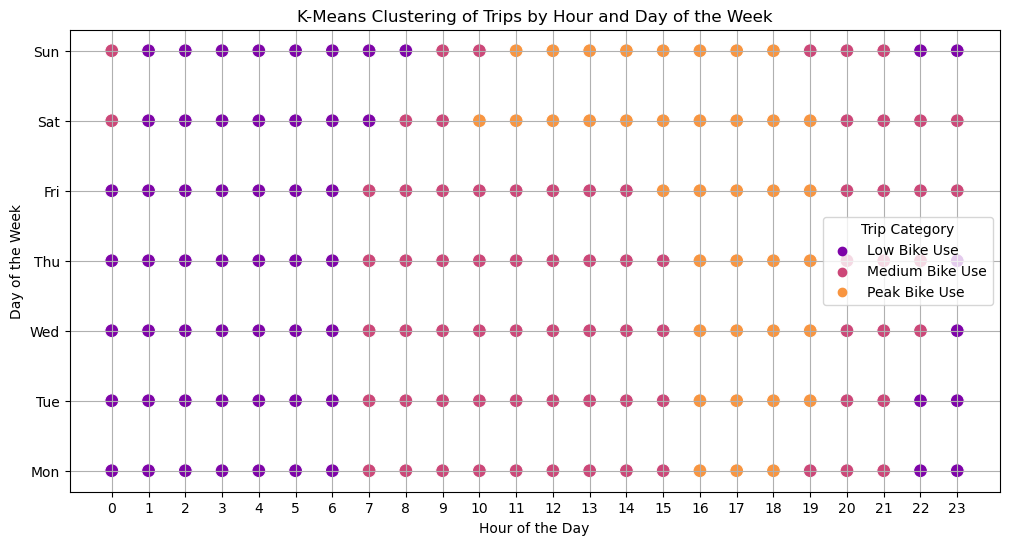

In [125]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=trip_counts, x='hour_started_at', y='day_of_week', hue='trip_category', palette='plasma', s=100)
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('K-Means Clustering of Trips by Hour and Day of the Week')
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.yticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Label days
plt.grid(True)
plt.legend(title='Trip Category')
plt.show()

In [127]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour_started_at,day_of_week,month,day_of_week_name,month_of_2021,trip_duration_in_seconds
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,0,16,5,1,Sat,Jan,625.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,0,18,2,1,Wed,Jan,244.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,0,22,3,1,Thu,Jan,80.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,0,13,3,1,Thu,Jan,702.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,1,2,5,1,Sat,Jan,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,1,13,6,12,Sun,Dec,1153.0
5595059,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,0,19,0,12,Mon,Dec,421.0
5595060,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,0,8,3,12,Thu,Dec,497.0
5595061,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,0,9,0,12,Mon,Dec,853.0
